# The Process

![Data Science Overview](assets\images\DataScienceOverview.png)

[Image Reference](https://www.oreilly.com/library/view/architectural-patterns/9781787287495/5c8b6daa-6c72-4e9e-a374-6c1c5f31ee0f.xhtml)

# The Tools

![Data Science Tools](assets\images\DataScienceTools.png)

[Image Reference](http://datasciencecornwall.blogspot.com/2018/09/python-for-data-science-top-10-tools.html)

# Step 1 - Determine the problem
What is the question we are trying to answer? 

Have you ever wondered how Spotify or Pandora suggest songs to you based on what is in your playlist? Or when you shop on the American Eagle website how does it know to recommend those "Frequently bought together items?" These types of recommendations are now part of our daily lives. They may seem very simple on the surface, but they are actually complext mathematical systems and statistical algorithms used to predict these recommendations. 

Today, we are going to create a simple movie recommender system using Python.


# Step 2 - Collect Data

We will be using the MovieLens [DataSet](https://grouplens.org/datasets/movielens/latest/)

This small version is included in the repo you forked.

- We will be using the small version of the dataset which has 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users
- It was last updated 9/2018
- The full dataset has 27,000,000 ratings and 1,100,000 tag applications applied to 58,000 movies by 280,000 users. Includes tag genome data with 14 million relevance scores across 1,100 tags.



# Step 3 - Explore the Data
This is usually an iterative process. What is in our data and how can we use it, maniuplate it, and understand it to solve our problem?

We will use the NumPy and Pandas libraries to help us with this process. NumPy is the foundational library used for computational data science with Python. We use functions in this library to do the math "heavy lifting". Pandas is based on NumPy and is mainly used for data manipulation 

Since we are creating a movie recommender, it makes sense to take a peek at the movie data first. 
___
***Exercise***

Run the code in the block below

In [1]:
import numpy as np 
import pandas as pd

movie_names = pd.read_csv("assets\data\ml-latest-small\movies.csv")  
movie_names.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

From the dataframe above, we get a peek into our data and its formatting. 

### Exercise
Record some observations about the movies data in this markdown block. 

1. What information do we have about each movie?
   - Your answer here 
2. What do you notice about the title data?
   - Your answer here
3. What do you notice about the genres data?
   - Your answer here

Does this data look like it will be useful for our purposes?

We have seen the first few rows of our movies data. Now, let's explore the data a bit further by taking a look at more of the data. 
_____
### Exercise
Do each of the following in a separate code block on the movie_names data.
1. Take a look at the first 20 rows of the data. (Hint: head() can take a parameter)
2. Use the `.tail()` to look at the last 10 rows of data.

In [2]:
movie_names.head(5000)

movieId                                              title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
5           6                                        Heat (1995)   
6           7                                     Sabrina (1995)   
7           8                                Tom and Huck (1995)   
8           9                                Sudden Death (1995)   
9          10                                   GoldenEye (1995)   
10         11                     American President, The (1995)   
11         12                 Dracula: Dead and Loving It (1995)   
12         13                                       Balto (1995)   
13         14                                       Nixon (1995)   
14         15                            Cutthroat Island (1995)   
15         16                                      Casino (1995)   
16         17                       Sense and Sensibility (1995)   
17         18                                  Four Rooms (1995)   
18         19              Ace Ventura: When Nature Calls (1995)   
19         20                                 Money Train (1995)   
20         21                                  Get Shorty (1995)   
21         22                                     Copycat (1995)   
22         23                                   Assassins (1995)   
23         24                                      Powder (1995)   
24         25                           Leaving Las Vegas (1995)   
25         26                                     Othello (1995)   
26         27                                Now and Then (1995)   
27         28                                  Persuasion (1995)   
28         29  City of Lost Children, The (Cité des enfants p...   
29         30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
...       ...                                                ...   
4970     7581                           Fountainhead, The (1949)   
4971     7584                           Woman of the Year (1942)   
4972     7587                  Samouraï, Le (Godson, The) (1967)   
4973     7614                                   Oklahoma! (1955)   
4974     7615                               Desert Hearts (1985)   
4975     7616                                 Body Double (1984)   
4976     7618                                     Chaplin (1992)   
4977     7619                         Miracle Worker, The (1962)   
4978     7620                            Monster in a Box (1992)   
4979     7624                                 School Ties (1992)   
4980     7636                                Raising Cain (1992)   
4981     7646                                    Rose Red (2002)   
4982     7647                               Noises Off... (1992)   
4983     7649                 Babylon 5: In the Beginning (1998)   
4984     7650   Witchfinder General (Conquerer Worm, The) (1968)   
4985     7657                                      Versus (2000)   
4986     7669                         Pride and Prejudice (1995)   
4987     7698                         China Syndrome, The (1979)   
4988     7700  Wages of Fear, The (Salaire de la peur, Le) (1...   
4989     7701                      Look Who's Talking Too (1990)   
4990     7702                    Bells of St. Mary's, The (1945)   
4991     7704                            Delta Force, The (1986)   
4992     7705                                Pat and Mike (1952)   
4993     7706                             Animal Crackers (1930)   
4994     7707                           He Said, She Said (1991)   
4995     7708                                   Bedazzled (1967)   
4996     7713                                  Cat People (194

So, we have taken a pretty good look at our movies_data, but is it enough data to create recommendations? What other data do you think we might need to make an effective recommendation system?

_________
### Exercise
1. Create a new code block and load the ratings.csv file into a dataframe called ratings_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?

In [3]:
#remove this answer block
ratings_data = pd.read_csv("assets\data\ml-latest-small\\ratings.csv")


In [4]:
#remove this answer block
ratings_data.head(20)


userId  movieId  rating  timestamp
0        1        1     4.0  964982703
1        1        3     4.0  964981247
2        1        6     4.0  964982224
3        1       47     5.0  964983815
4        1       50     5.0  964982931
5        1       70     3.0  964982400
6        1      101     5.0  964980868
7        1      110     4.0  964982176
8        1      151     5.0  964984041
9        1      157     5.0  964984100
10       1      163     5.0  964983650
11       1      216     5.0  964981208
12       1      223     3.0  964980985
13       1      231     5.0  964981179
14       1      235     4.0  964980908
15       1      260     5.0  964981680
16       1      296     3.0  964982967
17       1      316     3.0  964982310
18       1      333     5.0  964981179
19       1      349     4.0  964982563

_________
### Exercise
1. Create a new code block and load the links.csv file into a dataframe called links_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?_________

In [5]:
links = pd.read_csv("assets\data\ml-latest-small\\links.csv")


_________
### Exercise
1. Create a new code block and load the tags.csv file into a dataframe called tags_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?

In [6]:
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

# Step 4 - Analyze the Data

We have taken a look at the data available to us and it seems as if the ratings_data and the movie_names will be most useful for our purposes. We did notice that the ratings_data dataframe contains the movieId but not the movie title which makes it difficult for us to understand it. We need a way to add the movie_names data to the ratings_data. For this we can use a pandas method called `merge()` which has the following usage:

`pd.merge(left, right, on=?)`
- **left**: A DataFrame or named Series object.
- **right**: Another DataFrame or named Series object.
- **on**: Column or index level names to join on. Must be found in both the left and right DataFrame and/or Series objects.

_________
### Exercise
1. Create a new code block and use the pandas `.merge()` to the ratings_data with the movie_names data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data

Now we have our movie names with ratings, but for each movie title, we have individual ratings. What would really be more useful is to have the mean or average of the ratings for each movie. We can do that by using the pandas method `.groupby.mean()`

Let's take a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html?highlight=mean#pandas.core.groupby.GroupBy.mean) for that method.

I think the last example is the one that makes sense for our case.

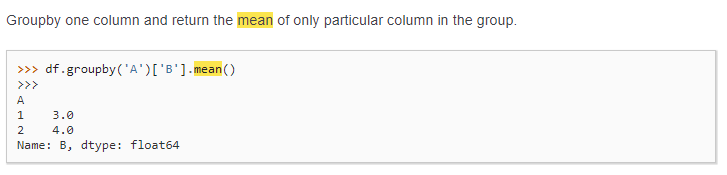

_________
### Exercise
1. Create a new code block and use the pandas `.groupby()` and `mean()` methods to put the average data in a dataframe called averaged_movie_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data

Ok! Now we have movie names along with their averge rating. It looks like the list is sorted on title. Wouldn't it be more helpful if the list was sorted by average rating? I would like to see the movies that had the highest ratings.

_________
### Exercise
1. Create a new code block and use the pandas `.sort_values(ascending=False)` method on the averaged_movie_data dataframe.
2. This time, try "chaining" the `head()` method on the end as a shorthand way to see the data.
3. Create a markdown block to note any observations you make about the data.

Hmmm...The thing I noticed about this data is I have not heard of any of these movies. Why do you think that is? Do you think the data in this format will help us create a great recommender system? 

I am wondering if the number of ratings for each movie is affecting this?
_________
### Exercise
1. Run the Code Block below
3. Create a markdown block to note any observations you make about the data. Have you heard of any of the movies?

In [8]:
movie_data = pd.merge(movie_names, rating_data, on-"movieId")

NameError: name 'rating_data' is not defined

In [7]:
movie_ratings_count = movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
movie_ratings_count.head()

NameError: name 'movie_data' is not defined

The movies have now been sorted according to the ascending order of their ratings. However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

Let's take a look at some moview with lots of ratings.

_________
### Exercise
1. Run the Code Block below
3. Create a markdown block to note any observations you make about the data. Have you heard of any of the movies?

In [ ]:
ratings_mean_count = pd.DataFrame(averaged_movie_data)
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_ratings_count)  
ratings_mean_count.head()  

Now you can see some really good movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes. Let's create a new dataframe that contains both of these attributes.

We'll first add the average rating of each movie to the data frame. 

Next, we need to add the number of ratings for a movie to the ratings_mean_count dataframe. 

_________
### Exercise
1. Run the Code Block below
3. Create a markdown block to note any observations you make about the data. 

In [ ]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())  
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())  
ratings_mean_count.head()  



Now, we have our data mapped to show both the rating and the number of ratings. Continuing to explore our data, let's use the `matplotlib` library to help give us an idea of how many ratings there are for each movie.

# Step 4 - Visualize the Data
For the next section, we will be using the matplotlib library to visualize the data we are working with,

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")

From this, we can see that a vast majority of the movies have less than 50 ratings. Let's take a look at the average ratings using a histogram. 

In [ ]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
ratings_mean_count['rating'].hist(bins=50)  


We generally believe that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating. Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings:

In [ ]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

# Step 5 - Take Action and Make Decisions
We spent quite a bit of time on visualizing and preprocessing our data. Now is the time to find the similarity between movies.

We will use the correlation between the ratings of a movie as the similarity metric. To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie. Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

In [ ]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  
user_movie_rating.head() 

We know that each column contains all the user ratings for a particular movie. Let's find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it. We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

To find the user ratings for "Forrest Gump (1994)", execute the following script:

In [ ]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']  
forrest_gump_ratings.head()  

Now let's retrieve all the movies that are similar to "Forrest Gump (1994)". We can find the correlation between the user ratings for the "Forest Gump (1994)" and all the other movies using corrwith() function as shown below:

In [ ]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head()  

In the above script, we first retrieved the list of all the movies related to "Forrest Gump (1994)" along with their correlation value, using corrwith() function. Next, we created a dataframe that contains movie title and correlation columns. We then removed all the NA values from the dataframe and displayed its first 5 rows using the head function.

Let's sort the movies in descending order of correlation to see highly correlated movies at the top. Execute the following script:

In [ ]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10) 

From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who watched '"Forest Gump (1994)" and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe. Execute the following script to do so:

In [ ]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head(5)  

You can see that the movie "...And Justice for All (1979)", which has the highest correlation has only three ratings. This means that only three users gave same ratings to "Forest Gump (1994)", "...And Justice for All (1979)". However, we can deduce that a movie cannot be declared similar to the another movie based on just 3 ratings. This is why we added "rating_counts" column. Let's now filter movies correlated to "Forest Gump (1994)", that have more than 50 ratings. The following code will do that:

In [ ]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()  

Now you can see from the output the movies that are highly correlated with "Forrest Gump (1994)". The movies in the list are are also popular Hollywood movies, and since "Forest Gump (1994)" is also a very famous movie, there is a high chance that these movies are correlated.

_________
### Exercise
1. Run the following code block with our "improved" recommender to see what is recommended for 'Toy Story (1995)'.
2. Do you agree with the movies that were recommended? Why? or Why not?

In [ ]:
my_movie_ratings = user_movie_rating['Star Wars: Episode IV - A New Hope (1977)']  
movies_like_my_movie = user_movie_rating.corrwith(my_movie_ratings)
corr_my_movie = pd.DataFrame(movies_like_my_movie, columns=['Correlation'])  
corr_my_movie.dropna(inplace=True)   
corr_my_movie = corr_my_movie.join(ratings_mean_count['rating_counts'])  
corr_my_movie[corr_my_movie ['rating_counts']>50].sort_values('Correlation', ascending=False).head()    

_________
### Exercise
1. Create a new code block and run our recommender with 'Princess Bride, The (1987)'
1. Create a new code block and run our recommender with 'Star Wars: Episode IV - A New Hope (1977)'
2. Create a new code block and run our recommender with 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'
4. Create a new code block and run our recommender with 'Finding Nemo (2003)'
1. Create a new code block and run our recommender with 'Dark Knight, The (2008)'
2. Do you agree with the movies that were recommended? Why? or Why not?

_________
### Exercise
1. Use the code below to look up some of your favorite movies and try them out in the recommender.

In [ ]:
movie_names[movie_names['title'].str.contains('star', case=False)]